# Assignment 2 - Machine Learning Basics

## **BRYCE YOUNG**
Netid:  **by197116**

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [ ]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER 1**
1. **A flexible statistical learning method such as KNN would likely outperform a less flexible model** such as linear regression in this scenario. With a high number of $n$ observations, we can increase the $K$ value to fit a model with relatively low bias and low variance. KNN fits work best when $p$ is small.

2. **A less flexible model such as linear regression would outperform a flexible model** such as KNN in this scenario. This is because KNN performs best with a large sample size, and spreading the samples across multiple predictors essentially reduces this sample size, leading to the curse of dimensionality in which a given $(i,j)$ observation has no nearest neighbors. This results in a poor KNN fit.

3. **A more flexible method will likely outperform a less flexible method** because less flexible methods such as linear regression perform poorly when fit to non-linear relationships.  Flexible models have the capacity to adapt and fit to intricate, non-linear relationships, allowing them to provide more accurate predictions.

4. **In relative terms, a less flexible method will likely perform better** relative to the method that yielded extremely high variance in the test data. The bias-variance tradeoff suggests that the method used was overfitting the training data, and that less flexibility could reduce this overfitting, resulting in higher bias but lower variance. On the other hand, high variance suggests that there is a lot of noise - unexplained veriability - in the data, suggesting that the model being used is too simple, and that **variance can be reduced by using a more flexible model that fits a potentially complex relationship more accurately**.



## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER 2**

**(a)** (i) This is a regression problem; (ii) We are most interested in inference; (iii) $n = 500, p = 3$.

**(b)** (i) This is a classification problem; (ii) We are most interested in prediction; (iii) $n = 20, p = 13$

**(c)** (i) This is a regression problem; (ii) We are most interested in prediction; (iii) $n = 52, p = 3$


# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

test_points = np.array([0, 0, 0])

edist = np.sqrt(np.sum((X - test_points) **2, axis = 1))
euclidean_distances = pd.DataFrame({'Observation': [f'{i+1}' for i in range(len(edist))],
                   'Euclidean Distance': edist})
euclidean_distances.set_index('Observation', inplace=True)
euclidean_distances

,Euclidean Distance
Observation,
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


**ANSWER 3**:

**(a)** See table above ^^^

**(b)** Given $K = 1$, we predict the test point to be BLUE. This is because observation 5 has the lowest Euclidean distance, so our prediction will be dependent on this single nearest point, which is BLUE.

**(c)** Given $K = 3$, we predict the test point to be RED. We look at the 3 observations with the lowest Euclidean Distances (Observations 2, 5, and 6 with Predictions RED, BLUE and RED, respectively), and we find the majority classifier which is RED.

**(d)** If the Bayes decision boundary is highly non-linear, then the best value for $K$ would be small, becuase that would create a highly non-linear classification boundary.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [9]:
pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/59/ed/548f6f686845d386a727a51a3daa411d95fc599649a2d54705f6773ac259/scikit_learn-1.3.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/3a/98/3041681b3a0fef0f59033861a05d846aa1d284b07b531ce35b1b97cc2e93/scipy-1.11.3-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.3 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.wh

In [10]:
import sklearn

**ANSWER 4a:**

In [102]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
      self.X_train = None
      self.y_train = None

    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X_train = x
        self.y_train = y

    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label
        # Calculate the distance from each vector in x to the training data
        for test_sample in x:
          distances = [] # Store distances from test to training samples

          for train_sample in self.X_train: # Obtain distances
            distance = np.sqrt(np.sum((train_sample - test_sample) ** 2))
            distances.append(distance)

          k_indices = np.argsort(distances)[:k] # Obtain the k lowest distances

          k_labels = [self.y_train[i] for i in k_indices] # Match training labels to k lowest distances

          predicted = max(set(k_labels), key = k_labels.count) # Define prediction as the most common value in k

          y_hat.append(predicted) # Store the estimated class label

        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [13]:
print(X_train_lo.head)

<bound method NDFrame.head of      5.277959276509690767e+00  7.337077191209202986e+00
0                    3.220191                  1.425023
1                   14.034404                  4.622037
2                   24.374362                  6.965873
3                    6.585567                 10.713930
4                    4.271135                 -4.109477
..                        ...                       ...
994                 -4.004374                 -7.881469
995                 -1.137172                  8.344147
996                -10.560278                 12.686060
997                  0.903599                 14.878221
998                -17.116952                  1.275550

[999 rows x 2 columns]>


**ANSWER 4B AND 4C:** Here is my code. I could not get it to work.

In [103]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset
#   and time the predictions of each
import time
import numpy as np
import pandas as pd

X_train_lo = pd.read_csv('H:/Education/UMT_Grad_School/Machine Learning CSCI547/Assignment_2/A2_X_train_low.csv', header = None)
X_train_hi = pd.read_csv('H:/Education/UMT_Grad_School/Machine Learning CSCI547/Assignment_2/A2_X_train_high.csv', header = None)
y_train_lo = pd.read_csv('H:/Education/UMT_Grad_School/Machine Learning CSCI547/Assignment_2/A2_y_train_low.csv', header = None)
y_train_hi = pd.read_csv('H:/Education/UMT_Grad_School/Machine Learning CSCI547/Assignment_2/A2_y_train_high.csv', header = None)
x_test_lo = pd.read_csv('H:/Education/UMT_Grad_School/Machine Learning CSCI547/Assignment_2/A2_X_test_low.csv', header = None)
x_test_hi = pd.read_csv('H:/Education/UMT_Grad_School/Machine Learning CSCI547/Assignment_2/A2_X_test_low.csv', header = None)

#### LOW PARAMETER MODEL EVALUATION ####
start_lo = time.time()

knn_low = Knn()
knn_low.fit(X_train_lo, y_train_lo)
yhat_lo = knn_low.predict(x_test_lo, 5)
accuracy_lo = knn_low.accuracy(y_train_lo, yhat_lo)

end_lo = time.time()

lo_time = end_lo - start_lo

print(f"Accuracy of the KNN classifier for the low parameter model is: {accuracy_lo}%")
print("\nTime [sec] of KNN classifier for low parameter model:", f"{lo_time: .1f}")

#### HIGH PARAMETER MODEL EVALUATION ####
start_hi = time.time()

knn_high = Knn()
knn_high.fit(X_train_lo, y_train_hi)
yhat_hi = knn_high.predict(x_test_hi, 5)
accuracy_hi = knn_high.accuracy(y_train_hi, yhat_hi)

end_hi = time.time()

hi_time = end_hi - start_hi

print(f"Accuracy of the KNN classifier for the high parameter model is: {accuracy_hi}%")
print("\nTime [sec] of KNN classifier for high parameter model:", f"{hi_time: .1f}")

KeyError: 1

**ANSWER 4d:** Here is my code. I could not get it to work.

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start_sk = time.time()

sk_knn_lo = KNeighborsClassifier()
sk_knn_lo.fit(X_train_lo, y_train_lo)

y_hat_sklo = sk_knn_lo.predict(x_test_lo)

accuracy_sklo = accuracy_score(y_test_lo, y_hat_sklo)

end_sk = time.time()

sk_lo_time = end_sk - start_sk

print(f"Accuracy of the Scikit-Learn KNN classifier (low parameters): {accuracy_sklo:.2f}")
print("\nTime [sec] of Scikit-Learn KNN classifier for low parameter model:", f"{sk_lo_time: .1f}")
print(f"Accuracy of the KNN classifier for the low parameter model is: {accuracy_lo}%")
print("\nTime [sec] of KNN classifier for low parameter model:", f"{lo_time: .1f}")

C:\Users\by197116\AppData\Local\anaconda3\envs\rspatial\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


NameError: name 'y_test_lo' is not defined

**ANSWER 4e**

The drawbacks of the prediction process being slow depend on the goals of the model and the prediction. Broadly speaking, here are some of the drawbacks:

- **Increased computational costs:** Running computationally expensive models may require high computer performance. Resource constraints.
- **Iteration Velocity:** Sometimes models are not perfect in the development stage, and they must be run and tuned iteratively in order to achieve a complete version. This is difficult if the model takes hours or days to finish running.
- **Scaling challenges:** The slow prediction models may not be viable to use for huge datasets due to computational requirements, user experience and iteration velocity.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWERS 5a and 5b:**

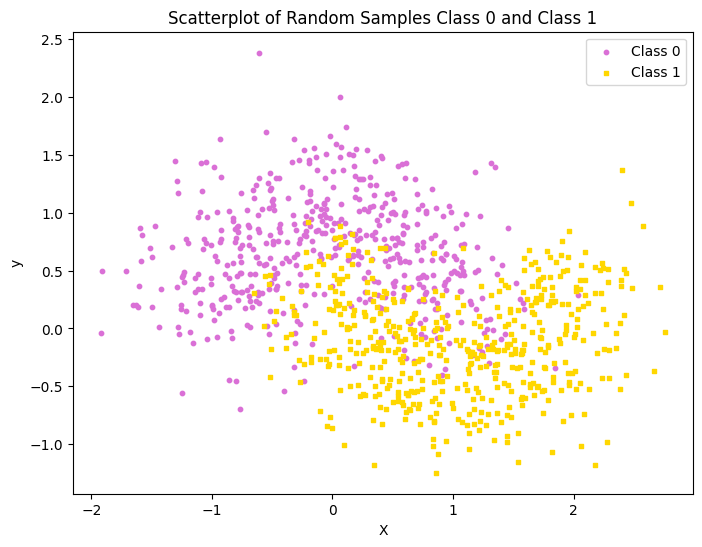

In [22]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

X, y = sklearn.datasets.make_moons(1000, noise = 0.35)

class1 = X[y == 1]
class0 = X[y == 0]

plt.figure(figsize = (8,6))
plt.scatter(class0[:, 0], class0[:, 1], c='orchid', label='Class 0', marker='o', s=10)
plt.scatter(class1[:, 0], class1[:, 1], c='gold', label='Class 1', marker='s', s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 'best')

plt.title('Scatterplot of Random Samples Class 0 and Class 1')
plt.show()

**ANSWER 5c:**

In [30]:
import numpy as np

subsets = []

# Perform random sampling with replacement three times to create three subsets
for _ in range(3):
    subset_indices = np.random.choice(len(X), size=100, replace=True)
    subset_X = X[subset_indices]
    subset_y = y[subset_indices]
    subsets.append((subset_X, subset_y))

classifiers = [] # Create a storage unit for 3 classifiers for each of the 3 subsets
ksets = [1,25,50] # Define k for each of the 3 classifiers

# This loop uses knn to classify each of the 3 subsets with each k value in ksets. It stores the classifiers in classifiers.
for subset_X, subset_y in subsets:

    sample_classifiers = []
    
    for k in ksets:
        knn_classifier = KNeighborsClassifier(n_neighbors = k)
        knn_classifier.fit(subset_X, subset_y)
        
        sample_classifiers.append(knn_classifier)

    classifiers.append(sample_classifiers)

classifiers

[[KNeighborsClassifier(n_neighbors=1),
  KNeighborsClassifier(n_neighbors=25),
  KNeighborsClassifier(n_neighbors=50)],
 [KNeighborsClassifier(n_neighbors=1),
  KNeighborsClassifier(n_neighbors=25),
  KNeighborsClassifier(n_neighbors=50)],
 [KNeighborsClassifier(n_neighbors=1),
  KNeighborsClassifier(n_neighbors=25),
  KNeighborsClassifier(n_neighbors=50)]]

**ANSWER 5d:**

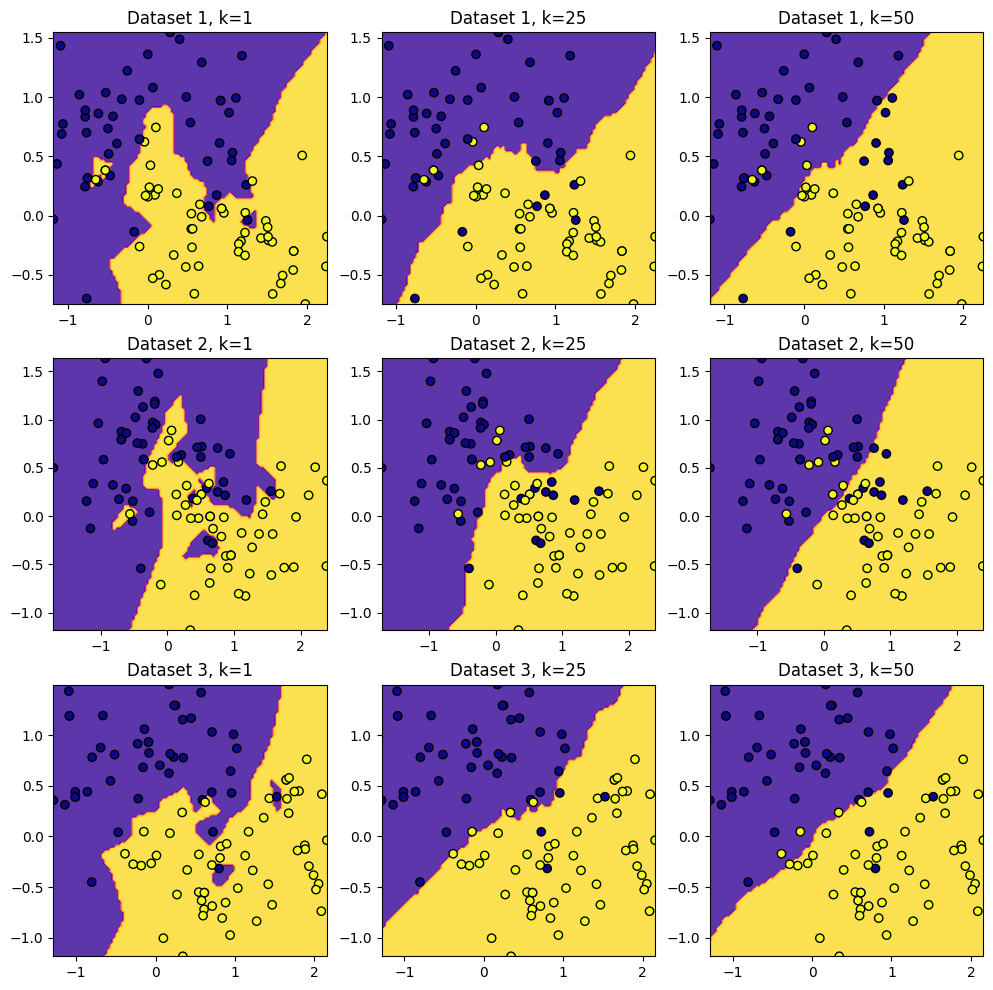

In [50]:
# To create a 3x3 grid using above data from lists 'subsets' and 'classifiers' we need to create 
# nested for loops that retrieve the data and plot them in separate subplots.

# Initiate a plot and subplots
fig, axs = plt.subplots(3, 3, figsize = (12, 12))

# Loop through each subset
for i, (subset_X, subset_y) in enumerate(subsets):
    # Loop through each classifier
    for j, knn_classifier in enumerate(classifiers[i]):
        
        # Generate a mesh grid of points for the current subset, to make the plots look nicer
        xx, yy = np.meshgrid(np.linspace(subset_X[:, 0].min(), subset_X[:, 0].max(), 100),
                             np.linspace(subset_X[:, 1].min(), subset_X[:, 1].max(), 100))
        
      # Use the trained classifier to make predictions on the mesh grid
        Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the decision boundary on the corresponding subplot
        axs[i, j].contourf(xx, yy, Z, cmap=plt.cm.plasma, alpha=0.8)
        axs[i, j].scatter(subset_X[:, 0], subset_X[:, 1], c=subset_y, cmap=plt.cm.plasma, edgecolor='black')
        axs[i, j].set_title(f'Dataset {i+1}, k={ksets[j]}')

**ANSWER 5e:**

- Where $k = 1$, the data are fit very well for all datasets. However, where $k = 1$, the boundary varies materially between datasets.
- As we move from left to right, the decision boundaries smooth out, fitting the data less precisely.
- For higher values of $k$, the decision boundaries between datasets are increasingly similar.

**ANSWER 5f:**

The bias-variance tradeoff describes a process of adjusting a model's ability to fit training data (good fit = low bias), and its ability to generalize to other datasets (good generalization = low variance).

We can visualize the bias-variance tradeoff using the plots above: 
- In the first column, almost zero points are misclassified in any of the three plots. We can therefore conclude that this model where $k=1$ has low bias. However, the shape of the decision boundary $k=1$ changes markedly between datasets. Since the model cannot maintain a similar shape to achieve similar results between datasets, we conclude that $k=1$ has high variance.
- Conversely, we can look at all three subplots in the third column where $k=50$ and see that the shape of the decision boundary is quite similar for all three datasets, so the model has low variance. Compared to the plots in the left column, the model where $k=50$ has higher bias, meaning it misclassifies more points than the model where $k=1$.
- The decision that developers must make in this case is how well they want their model to generalize. If I were making the decision, $k=1$ would be a throw-out. However, there is a more difficult decision to be made between the models where $k=25$ and $k=50$. Where $k=50$, we don't see a material increase in misclassified points, and we can see that the model generalizes better than where $k=25$. The choice would depend on quantifying the tradeoff, as well as the purpose/application of the model. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER 6a:**

In [55]:
X_test, y_test = sklearn.datasets.make_moons(1000, noise = 0.35)

class1_test = X_test[y_test == 1]
class0_test = X_test[y_test == 0]

**ANSWER 6b:**

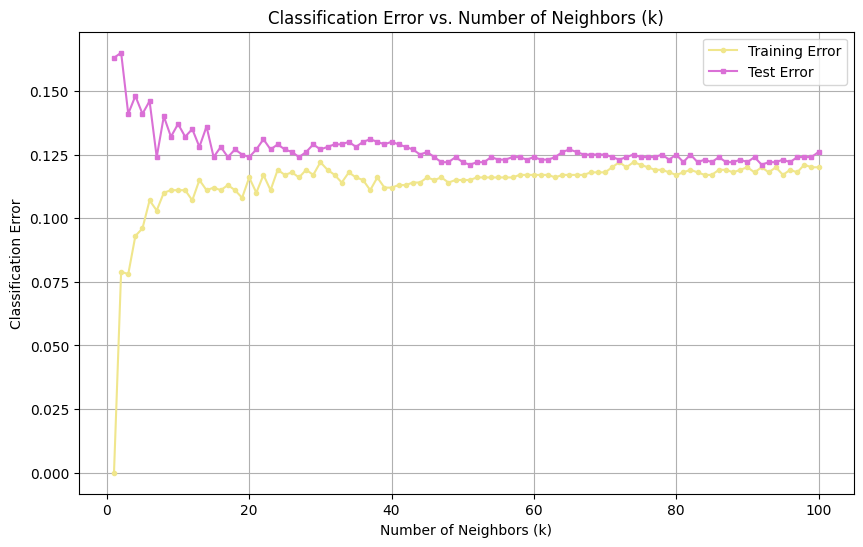

In [60]:
q6classifiers = []

k_values = range(1, 101)

# Loop through each value of k and train a k-NN classifier
for k in k_values:
    # Create a k-NN classifier with the current value of k
    q6knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training set
    q6knn_classifier.fit(X, y)
    
    # Append 
    q6classifiers.append(q6knn_classifier)

# Lists to store classification errors for training and test datasets
train_errors = []
test_errors = []

# Loop through each trained classifier
for q6knn_classifier in q6classifiers:
    # Calculate training error
    train_error = 1.0 - q6knn_classifier.score(X, y)
    train_errors.append(train_error)
    
    # Calculate test error
    test_error = 1.0 - q6knn_classifier.score(X_test, y_test)
    test_errors.append(test_error)

# Create a plot to visualize classification errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o', markersize = 3, color = 'khaki')
plt.plot(k_values, test_errors, label='Test Error', marker='s', markersize = 3, color = 'orchid')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()


**ANSWER 6c:**

The training and test errors seem to have an approximately inverse relationship with respect to $k$. That is, training error increases dramatically with small increases in $k$, when $k<10$. Conversely, the test error has the opposite relationship with values of $k$. The classification error rates for both test and training data stabilize somewhere around 0.120 when $k\approx25$ and do not improve materially even compared to $k=n$.

**ANSWER 6d**

An example of a $k$ value with high bias is $k=0$. An example of a $k$ value with high variance is $k=n$. This statement applies to all KNN models.

**ANSWER 6e**

The optimal model would have $k\approx25$ because it seems like a good balance of variance and bias.

**ANSWER 6f**

It is difficult to devise a broad statement that describes how to adjust the flexibility of models other than KNN classifiers. Depending on the model (e.g. linear regression, decision tree, PCA, etc.), the flexibility is influenced by a combination of hyperparameters specific to that model, the choice of features, and the target outcome.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER 7a:**

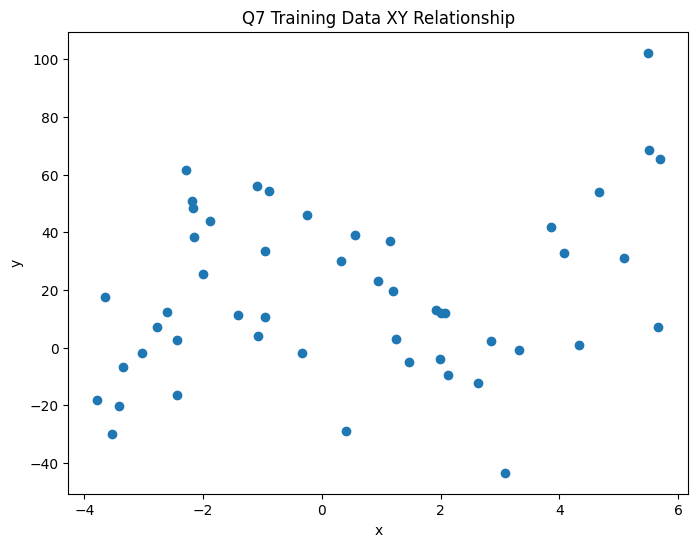

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

q7train = pd.read_csv('A2_Q7_train.csv', index_col = 0)

plt.figure(figsize = (8,6))
plt.scatter(q7train['x'], q7train['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Q7 Training Data XY Relationship')
plt.show()


In [3]:
from sklearn.linear_model import LinearRegression

X_train_q7 = q7train[['x']]
y_train_q7 = q7train['y']

lm_train = LinearRegression()

lm_train.fit(X_train_q7, y_train_q7)

lm_train_pred = lm_train.predict(X_train_q7)

In [4]:
r_squared = lm_train.score(X_train_q7, y_train_q7)
print(f"R-squared: {r_squared}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train_q7, lm_train_pred)
print(f"Mean Squared Error (MSE): {mse}")

coefficients = lm_train.coef_
intercept = lm_train.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

R-squared: 0.06486123304769698
Mean Squared Error (MSE): 791.4167471701106
Coefficients: [2.59072826]
Intercept: 17.204928179405222


**ANSWER 7b:**

$R^2$: 0.0649

**Mean Squared Error (MSE)**: 791.4167

**Equation**: $y = 2.6x + 17.2$

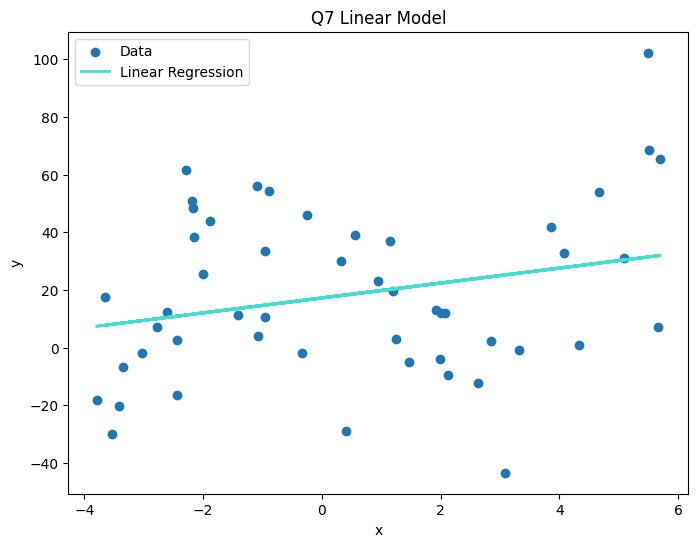

In [5]:
plt.figure(figsize = (8,6))
ax = plt.gca()

plt.scatter(q7train['x'], q7train['y'], label = 'Data')
plt.plot(X_train_q7, lm_train_pred, color='turquoise', linewidth=2, label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Q7 Linear Model')
plt.legend()

plt.show()

**ANSWER 7c:** Accuracy metrics for polynomial regression on training data

$R^2$: 0.421

**Mean Squared Error (MSE)**: 489.952

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 5

# Create a Polynomial Regression model using a pipeline
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the Polynomial Regression model
polyreg.fit(X_train_q7, y_train_q7)

# Predict using the polynomial regression model
polyreg_pred = polyreg.predict(X_train_q7)

# Get rsquared
r2_poly = r2_score(y_train_q7, polyreg_pred)

# Get MSE
mse_poly = mean_squared_error(y_train_q7, polyreg_pred)

print(f"R-squared: {r2_poly: .3f}")
print(f"MSE: {mse_poly: .3f}")

R-squared:  0.421
MSE:  489.952


**ANSWER 7d:**

In [17]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a linear regression model
lrg = LinearRegression()

# Initiate a polynomial feature transformer with a degree of 5
poly = pf(degree=5)

# Generate a range of values for predictions
x_range = np.linspace(np.min(X_train_q7), np.max(X_train_q7), 1000).reshape(-1, 1)

# Transform the training data and x_range to polynomial features so that they capture
# interactions and are in compatible formats
x_train_transformed = poly.fit_transform(X_train_q7)
x_range_transformed = poly.fit_transform(x_range)

# Run the model
mlr = lrg.fit(x_train_transformed, y_train_q7) # Train
y_hat = mlr.predict(x_train_transformed) # Predict

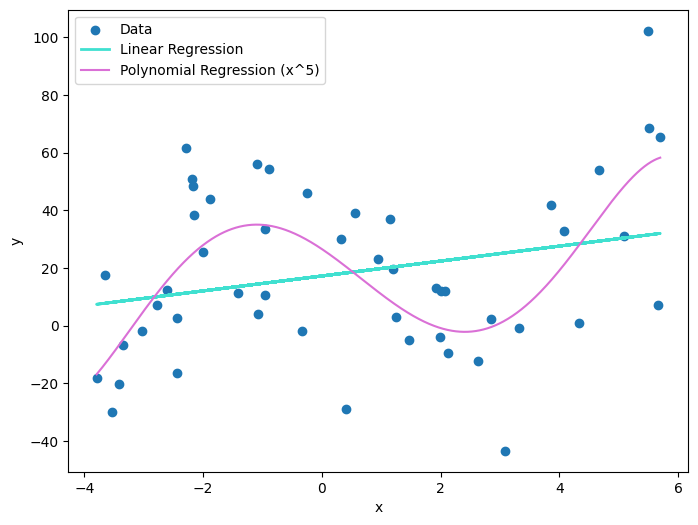

In [15]:
# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Scatter plot
plt.scatter(q7train['x'], q7train['y'], label='Data')

# Plot the linear regression line
plt.plot(X_train_q7, lm_train_pred, color='turquoise', linewidth=2, label='Linear Regression')

# Plot the polynomial regression curve
plt.plot(x_range, mlr.predict(x_range_transformed), color='orchid', label='Polynomial Regression (x^5)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

In [16]:
from sklearn.metrics import r2_score

#### Test model performance on test data ####

q7test = pd.read_csv('A2_Q7_test.csv', index_col = 0) # Read data

# Define test set variables
X_test_q7 = q7test[['x']]
y_test_q7 = q7test['y']

# Test the linear model
lm_test_pred = lm_train.predict(X_test_q7)

# Transform the test data to polynomial features
X_test_poly = poly.transform(X_test_q7)

# Test the polynomial model
mlr_pred = mlr.predict(X_test_poly)

#### Evaluate the performance ####

# Calculate R-squared for linear regression
r2_linear_test = r2_score(y_test_q7, lm_test_pred)

# Calculate Mean Squared Error for linear regression
mse_linear_test = mean_squared_error(y_test_q7, lm_test_pred)

# Calculate R-squared for polynomial regression
r2_poly_test = r2_score(y_test_q7, mlr_pred)

# Calculate Mean Squared Error for polynomial regression
mse_poly_test = mean_squared_error(y_test_q7, mlr_pred)

print("Linear Regression:")
print(f"R-squared: {r2_linear_test: .3f}")
print(f"Mean Squared Error: {mse_linear_test: .3f}")

print("\nPolynomial Regression:")
print(f"R-squared: {r2_poly_test: .3f}")
print(f"Mean Squared Error: {mse_poly_test: .3f}")


Linear Regression:
R-squared: -0.133
Mean Squared Error:  1116.663

Polynomial Regression:
R-squared:  0.129
Mean Squared Error:  858.757


C:\Users\by197116\AppData\Local\anaconda3\envs\rspatial\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


**ANSWER 7e:**
See above

**ANSWER 7f:**
The polynomial model with a degree of 3 performed better on both the training data and the test data. I have not been able to plot the poly line to visualize these results. My assumption is that a linear model is too simple for the disparate distribution of the data, and that a 3rd degree curvilinear performs better simply because it tracks through more data points, regardless of whether it has real explanatory power or not.

**ANSWER 7g:**
If the test data were significantly different from the training dataset, the predictive capability of the polynomial model would likely decrease, and the mean of the data would perform better over many tests. This is because the "mean" is as general as a model can be. Anything less general will be fitted to a certain trend, and if that trend is not present, it will not perform well.